In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

In [3]:
tickers = tickers.Symbol.to_list()

In [4]:
tickers = [i.replace('.','-') for i in tickers]

In [5]:
tickers

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMC

In [6]:
def RSIcalc(asset):
    
    df = yf.download(asset,start='2011-01-01')
    df['MA200'] =df['Adj Close'].rolling(window=200).mean() #from 'AdjClose' column , 200days Moving Average ->MA200
    df['price change'] = df['Adj Close'].pct_change() # daily return
    df['Upmove'] = df['price change'].apply(lambda x: x if x >0 else 0)
    df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)
    df['avg Up'] = df['Upmove'].ewm(span=19).mean()
    df['avg Down'] = df['Downmove'].ewm(span=19).mean()
    df = df.dropna()
    df['RS'] = df['avg Up'] / df['avg Down']
    df['RSI'] = df['RS'].apply(lambda x: 100 - (100/(x+1)))
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = 'No'
    
    return df

In [7]:
def getSignals(df) : 
    Buying_dates = []
    Selling_dates = []
    
    for i in range(len(df)-11) :
        if "Yes" in df['Buy'].iloc[i] :
            Buying_dates.append(df.iloc[i+1].name)
            for j in range(1,11) :
                if df['RSI'].iloc[i+j] > 40 : 
                    Selling_dates.append(df.iloc[i+j+1].name)
                    break 
                elif j == 10:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    
    return Buying_dates, Selling_dates


In [8]:
frame = RSIcalc(tickers[7])
buy, sell = getSignals(frame)

[*********************100%***********************]  1 of 1 completed


In [9]:
frame

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,avg Up,avg Down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2011-10-14,5.040000,5.070000,4.850000,4.920000,4.920000,12805400,7.61520,-0.010060,0.000000,0.010060,0.010500,0.017856,0.588013,37.028236,No
2011-10-17,4.900000,4.900000,4.650000,4.670000,4.670000,16611900,7.59765,-0.050813,0.000000,0.050813,0.009450,0.021152,0.446756,30.879853,No
2011-10-18,4.680000,4.840000,4.570000,4.830000,4.830000,21338700,7.57945,0.034261,0.034261,0.000000,0.011931,0.019037,0.626730,38.526971,No
2011-10-19,4.900000,4.920000,4.690000,4.730000,4.730000,18304000,7.55925,-0.020704,0.000000,0.020704,0.010738,0.019204,0.559160,35.862899,No
2011-10-20,4.720000,4.760000,4.450000,4.540000,4.540000,25240900,7.53740,-0.040169,0.000000,0.040169,0.009664,0.021300,0.453710,31.210479,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01,119.449997,125.669998,118.129997,125.230003,125.230003,54559800,92.21280,0.041587,0.041587,0.000000,0.012088,0.003443,3.510668,77.830332,No
2021-11-02,124.980003,128.460007,124.199997,127.629997,127.629997,53491900,92.40370,0.019165,0.019165,0.000000,0.012796,0.003099,4.129089,80.503362,No
2021-11-03,127.750000,130.600006,126.790001,130.529999,130.529999,59537800,92.61260,0.022722,0.022722,0.000000,0.013789,0.002789,4.943767,83.175654,No


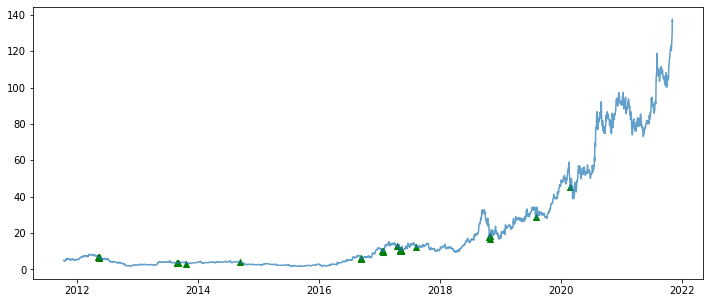

In [10]:
plt.figure(figsize = (12,5))
plt.scatter(frame.loc[buy].index,frame.loc[buy]['Adj Close'], marker = '^', c='g')
plt.plot(frame['Adj Close'], alpha = 0.7)

In [11]:
Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/ frame.loc[buy].Open.values

In [12]:
Profits

array([-0.07446805, -0.10549778, -0.06875935, -0.06065093, -0.04654654,
        0.05671644,  0.04733723,  0.06626507,  0.07926829,  0.06626507,
        0.01506023, -0.10552766,  0.06861065,  0.05236485,  0.08347826,
        0.12578614,  0.0870445 ,  0.10950407,  0.00798088,  0.04373176,
        0.01800944,  0.06021714,  0.05088058,  0.0697211 ,  0.02676862,
        0.08056481,  0.11357493,  0.13069748,  0.15221036,  0.15904366,
        0.18544483])

In [13]:
Wins = [i for i in Profits if i > 0]

In [14]:
len(Wins)/len(Profits)

0.8064516129032258

In [16]:
matrixsignals = []
matrixprofits = []

for i in range(len(tickers)) : 
    frame = RSIcalc(tickers[i])
    buy,sell = getSignals(frame)
    Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/ frame.loc[buy].Open.values
    matrixsignals.append(buy)
    matrixprofits.append(Profits)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

ValueError: cannot set a frame with no defined index and a scalar